## Visualización

In [101]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest


# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [102]:
df = pd.read_csv("hr_data_imputada.csv", index_col=0)
df.head()

,BusinessTravel,DailyRate,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,DateBirth,RemoteWork,PerformanceRating,TotalWorkingYears,MonthlyIncome
Attrition,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
no,unknown,684.0,6,3,unknown,1620.0,1,female,51.0,3,5,research_director,3,unknown,6462,7,no,13,3,0,5,3.0,20,15,15,1972,yes,3.0,32.595028,19537.0
no,unknown,699.0,1,4,life_sciences,2590.0,3,female,65.0,2,5,manager,3,unknown,5678,0,unknown,14,1,1,5,3.0,33,11,9,1971,yes,3.0,34.000000,19999.0
no,travel_rarely,532.0,4,2,technical_degree,3190.0,3,female,58.0,3,5,manager,4,married,4933,1,no,11,4,0,3,3.0,22,11,15,1981,yes,3.0,22.000000,19232.0
no,travel_rarely,359.0,2,4,medical,1.0,1,male,82.0,3,4,research_director,3,married,26703,3,unknown,19,2,2,2,3.0,20,5,6,1976,false,3.0,28.796638,17169.0
no,unknown,117.0,22,3,medical,19000.0,4,male,58.0,3,4,manager,4,unknown,2437,3,no,11,2,1,3,3.0,22,4,7,1975,yes,3.0,28.804658,17174.0


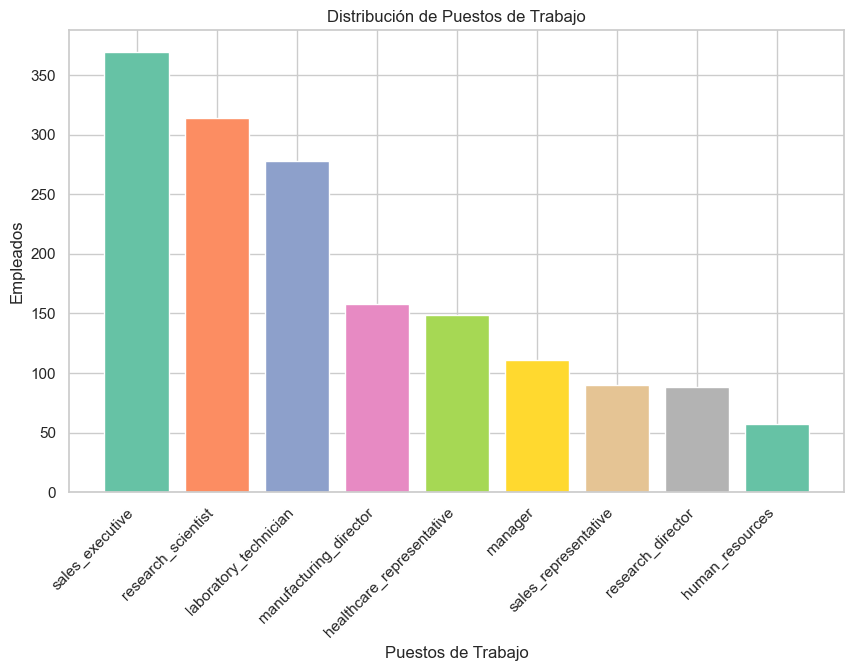

In [103]:
# Contar los valores de cada categoría en 'JobRole', excluyendo 'unknown'
job_role_counts = df_imputada[df_imputada['JobRole'] != 'unknown']['JobRole'].value_counts()

# Extraer las etiquetas y los valores para el histograma
labels = job_role_counts.index
sizes = job_role_counts.values

# Usar una paleta de colores predefinida de Seaborn
custom_palette = sns.color_palette("Set2")

# Crear el histograma con la paleta de colores predefinida
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=custom_palette)

# Personalizar aspectos del gráfico
plt.title('Distribución de Puestos de Trabajo')
plt.xlabel('Puestos de Trabajo')
plt.ylabel('Empleados')
plt.xticks(rotation=45, ha='right')  

# Mostrar el gráfico
plt.show()


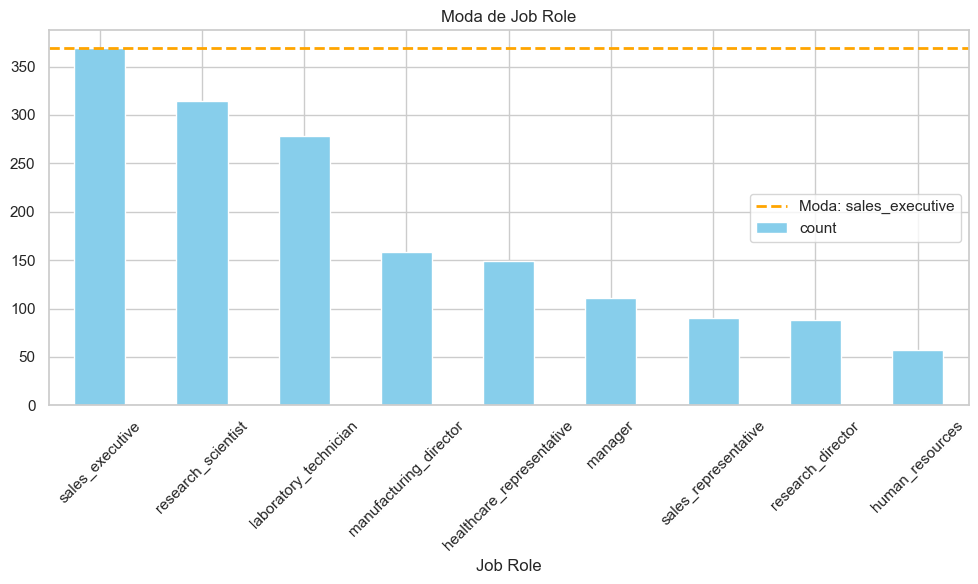

In [104]:
# MODA DE JOB ROLE

# Filtrar 'unknown' y calcular la moda de 'JobRole'
moda_job_role = df_imputada[df_imputada['JobRole'] != 'unknown']['JobRole'].mode().iloc[0]

# Contar las frecuencias de cada categoría en 'JobRole' (excluyendo 'unknown')
job_role_counts = df_imputada[df_imputada['JobRole'] != 'unknown']['JobRole'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
job_role_counts.plot(kind='bar', color='skyblue')

# Personalizar aspectos del gráfico
plt.title('Moda de Job Role')
plt.xlabel('Job Role')
plt.xticks(rotation=45)

# Resaltar la moda con otro color
plt.axhline(y=job_role_counts[moda_job_role], color='orange', linestyle='--', linewidth=2, label=f'Moda: {moda_job_role}')
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()

CONCLUSIÓN: La moda de Job Role es Sales_ executive

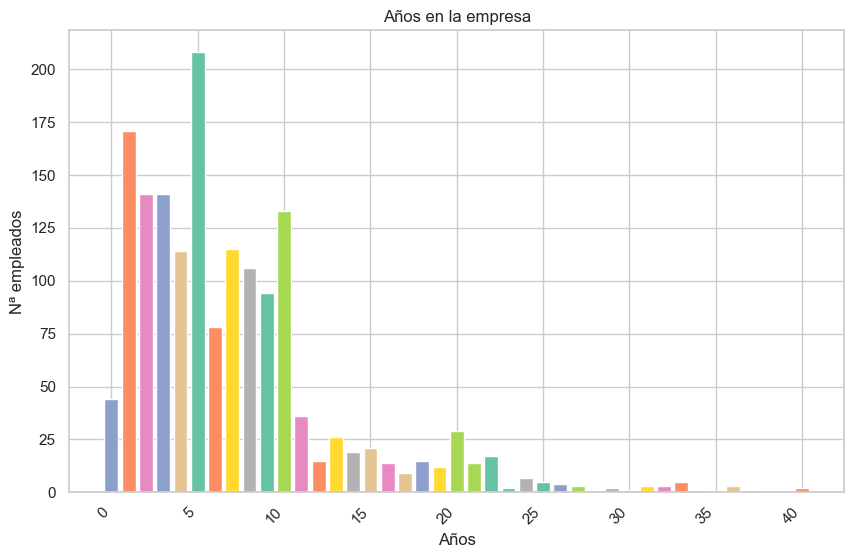

In [105]:
# Contar los valores de cada categoría en 'JobRole', excluyendo 'unknown'
Years_at_company_counts = df_imputada[df_imputada['YearsAtCompany'] != 'unknown']['YearsAtCompany'].value_counts()

# Extraer las etiquetas y los valores para el histograma
labels = Years_at_company_counts.index
sizes = Years_at_company_counts.values

# Usar una paleta de colores predefinida de Seaborn
custom_palette = sns.color_palette("Set2")

# Crear el histograma con la paleta de colores predefinida
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, sizes, color=custom_palette)

# Personalizar aspectos del gráfico
plt.title('Años en la empresa')
plt.xlabel('Años')
plt.ylabel('Nª empleados')
plt.xticks(rotation=45, ha='right')  

# Mostrar el gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


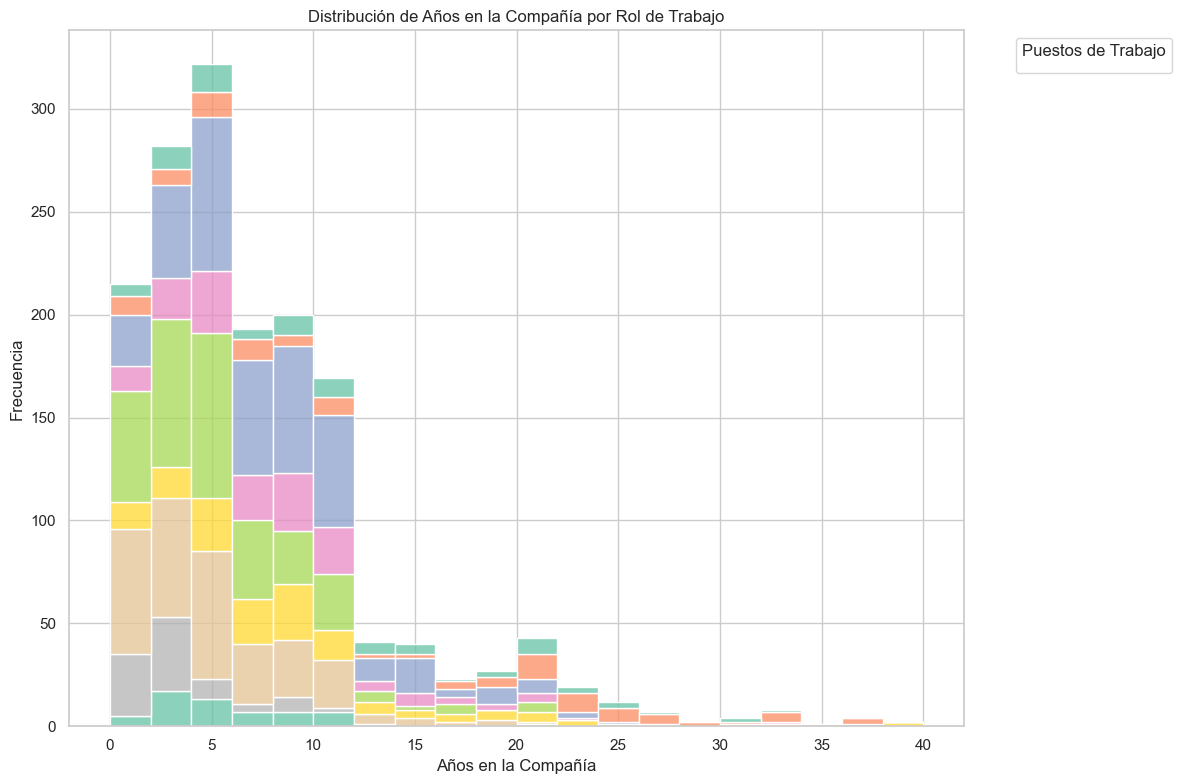

In [106]:
# Filtrar los datos para excluir 'unknown' en JobRole
df_filtered = df_imputada[df_imputada['JobRole'] != 'unknown']

# Crear la figura del histograma
plt.figure(figsize=(12, 8))

# Crear el histograma usando Seaborn
sns.histplot(data=df_filtered, x='YearsAtCompany', hue='JobRole', multiple='stack', palette='Set2', bins=20)

# Personalizar aspectos del gráfico
plt.title('Distribución de Años en la Compañía por Rol de Trabajo')
plt.xlabel('Años en la Compañía')
plt.ylabel('Frecuencia')
plt.legend(title='Puestos de Trabajo', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mover la leyenda fuera del gráfico

# Mostrar el gráfico
plt.tight_layout()
plt.show()


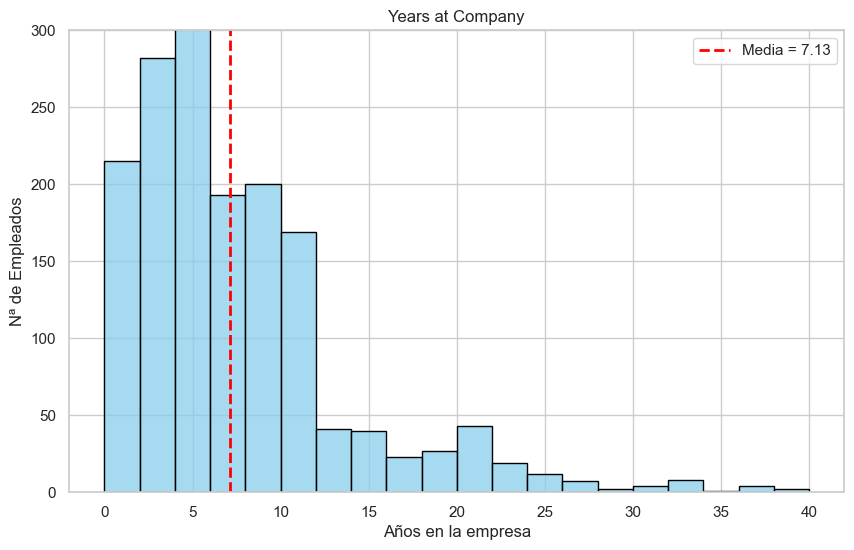

In [107]:
## MEDIA AÑOS EN LA EMPRESA

# Calcular la media de YearsAtCompany
mean_years = df_imputada['YearsAtCompany'].mean()

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.histplot(df_imputada['YearsAtCompany'], bins=20, kde=False, color='skyblue', edgecolor='black')
plt.axvline(mean_years, color='red', linestyle='dashed', linewidth=2, label=f'Media = {mean_years:.2f}')
plt.title('Years at Company')
plt.xlabel('Años en la empresa')
plt.ylabel('Nª de Empleados')
plt.ylim(0, 300)  # Limitar el eje y para una mejor visualización
plt.legend()  # Mostrar la leyenda
plt.show()


CONCLUSIÓN: 
- La mayoría de los empleados han trabajado en la compañía por menos de 10 años.
- Hay un pico notable en los primeros años (0-5 años), lo que podría indicar una alta rotación o una tendencia a contratar empleados nuevos.
- La media de años en la compañía es de aproximadamente 7.13 años, como se muestra por la línea roja discontinua.

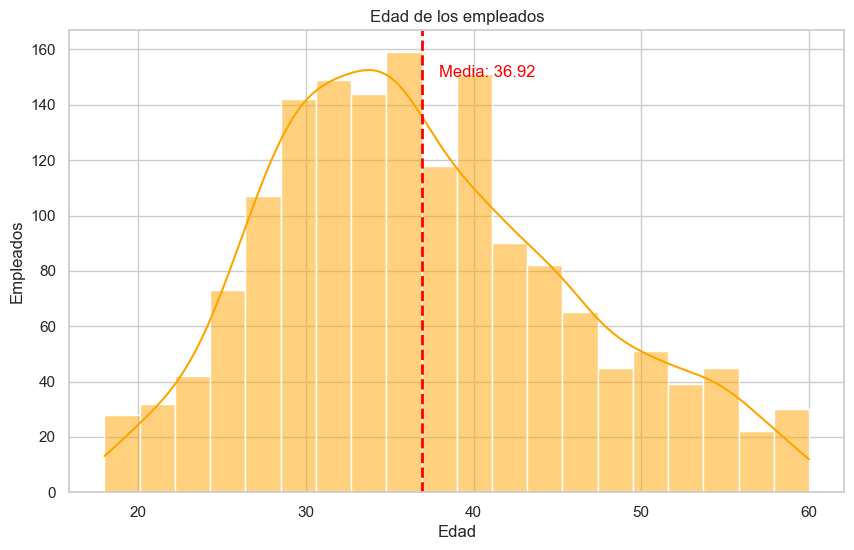

In [108]:
## MEDIA DE EDAD DE LOS EMPLEADOS

# Calcular la media de la columna 'Age'
mean_age = df_imputada['Age'].mean()

# Crear la figura del histograma
plt.figure(figsize=(10, 6))

# Crear el histograma usando Seaborn
sns.histplot(df_imputada['Age'], bins=20, kde=True, color='orange')

# Añadir una línea vertical para la media
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2)

# Personalizar aspectos del gráfico
plt.title('Edad de los empleados')
plt.xlabel('Edad')
plt.ylabel('Empleados')

# Añadir una etiqueta para la línea de la media
plt.text(mean_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Media: {mean_age:.2f}', color='red')

# Mostrar el gráfico
plt.show()


CONCLUSIÓN:
- La mayoría de los empleados tienen edades que varían entre los 20 y los 40 años.
- La curva de densidad muestra un pico alrededor de los 30 años, indicando que esta es la edad más común entre los empleados.
- La media de edad es de aproximadamente 36.92 años, como se muestra por la línea roja discontinua.

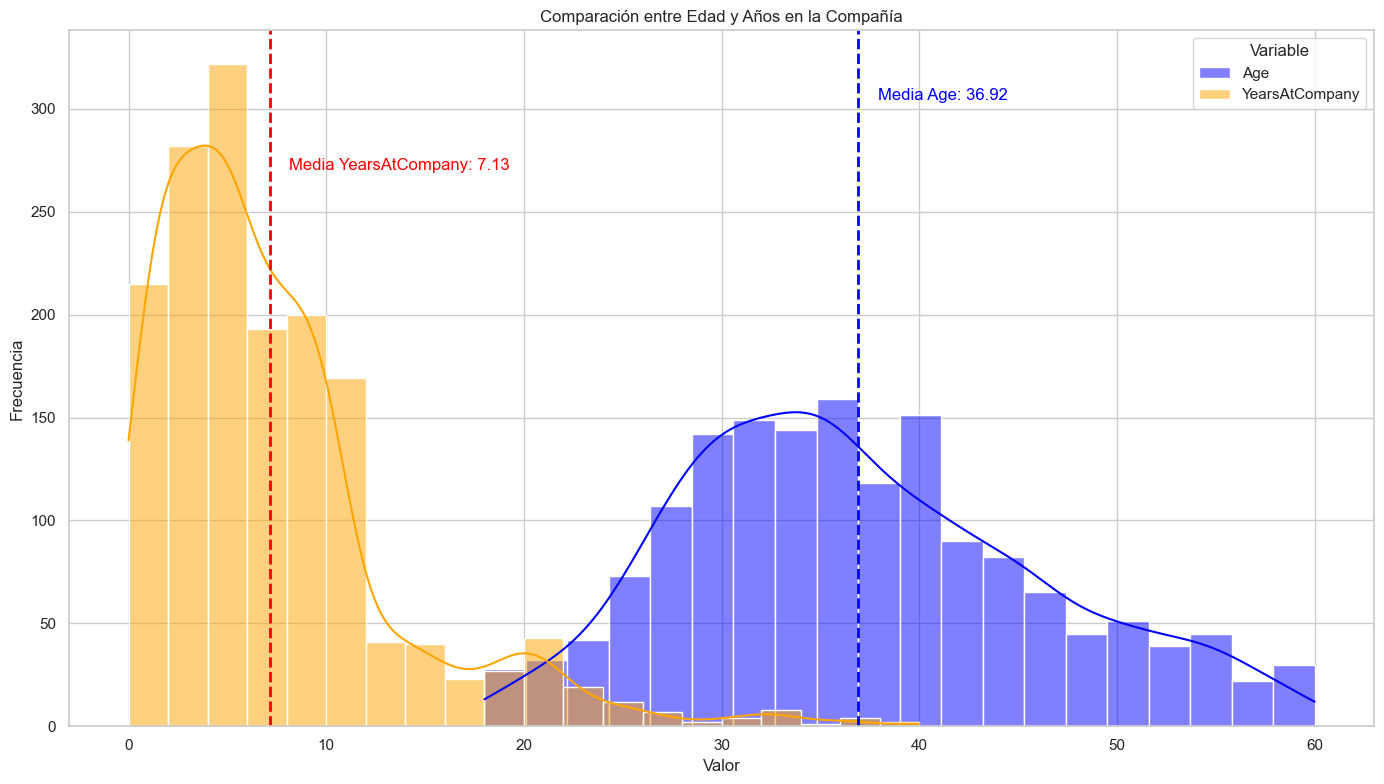

In [109]:
# COMPARACIÓN ENTRE EDAD Y AÑOS EN LA EMPRESA CON SUS MEDIAS

# Calcular las medias de las columnas 'Age' y 'YearsAtCompany'
mean_age = df_imputada['Age'].mean()
mean_years_at_company = df_imputada['YearsAtCompany'].mean()

# Crear la figura del histograma
plt.figure(figsize=(14, 8))

# Crear histogramas superpuestos para Age y YearsAtCompany
sns.histplot(df_imputada['Age'], bins=20, color='blue', kde=True, label='Age', alpha=0.5)
sns.histplot(df_imputada['YearsAtCompany'], bins=20, color='orange', kde=True, label='YearsAtCompany', alpha=0.5)

# Añadir líneas verticales para las medias
plt.axvline(mean_age, color='blue', linestyle='dashed', linewidth=2)
plt.axvline(mean_years_at_company, color='red', linestyle='dashed', linewidth=2)

# Añadir etiquetas de media
plt.text(mean_age + 1, plt.gca().get_ylim()[1] * 0.9, f'Media Age: {mean_age:.2f}', color='blue')
plt.text(mean_years_at_company + 1, plt.gca().get_ylim()[1] * 0.8, f'Media YearsAtCompany: {mean_years_at_company:.2f}', color='red')

# Personalizar aspectos del gráfico
plt.title('Comparación entre Edad y Años en la Compañía')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Añadir la leyenda
plt.legend(title='Variable')

# Ajustar el diseño para que se vea bien con los histogramas superpuestos
plt.tight_layout()

# Mostrar el gráfico
plt.show()


CONCLUSIÓN:
- La distribución de Age es más amplia y se extiende hasta alrededor de 60 años, mientras que la distribución de YearsAtCompany es más estrecha y se concentra principalmente en los primeros 20 años.
- La mayor parte de los empleados son jóvenes y relativamente nuevos en la compañía, lo que sugiere una fuerza laboral joven y posiblemente en crecimiento.
- Las curvas de densidad ayudan a visualizar las tendencias y la concentración de los datos en cada variable.

- El gráfico proporciona una visión clara de cómo se distribuyen la edad y los años en la compañía entre los empleados. La predominancia de empleados jóvenes y nuevos en la compañía puede indicar un enfoque en la contratación de talento joven y el crecimiento de la fuerza laboral. 

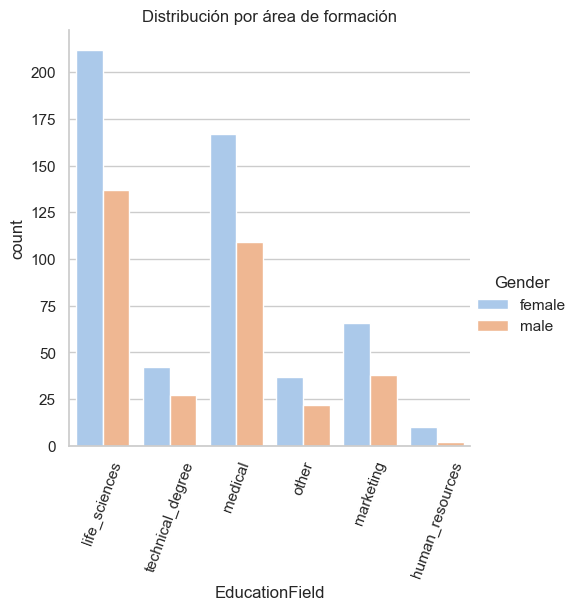

In [110]:
paleta = 'pastel'
sns.catplot(x="EducationField", data=df_imputada, kind="count", hue="Gender", palette=paleta)
plt.title('Distribución por área de formación') 
plt.xticks(rotation=70)
plt.show()

CONCLUSIÓN:
- Analizando la gráfica podemos observar que en todas las areas educativas es el genero femenino el que tiene más formación. 
- Ciencias de la Vida (Life Sciences): Hay más mujeres que hombres en esta área.
- Médica (Medical): La distribución es bastante equilibrada entre géneros.
- Técnico (Technical Degree): Hay más hombres que mujeres en esta categoría.
- Marketing: La distribución es equilibrada entre géneros.
- Recursos Humanos (Human Resources): Hay más mujeres que hombres.

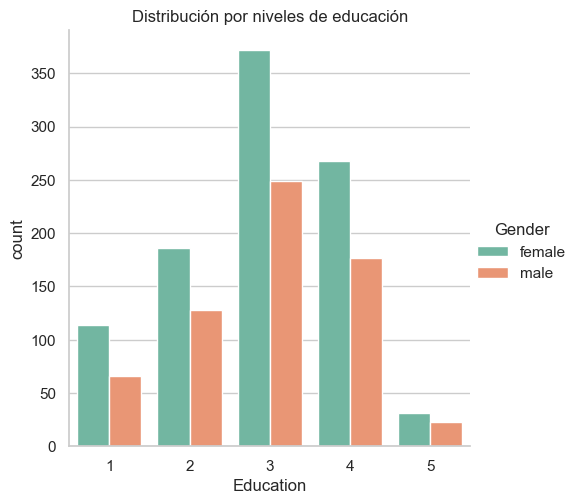

In [111]:
paleta = 'Set2'
sns.catplot(x="Education", data=df_imputada, kind="count", hue="Gender", palette=paleta)
plt.title('Distribución por niveles de educación') 
plt.show()

CONCLUSIÓN:
- Podemos observar que las mujeres en la empresa tienen mayor formación.
- La gráfica nos muestra que la mayoría tienen formación de nivel 3 que corresponde a educación secundaria obligatoria (ESO).
- Existe una disparidad de género en los diferentes niveles de educación.
- Las diferencias son más pronunciadas en los niveles más altos de educación.

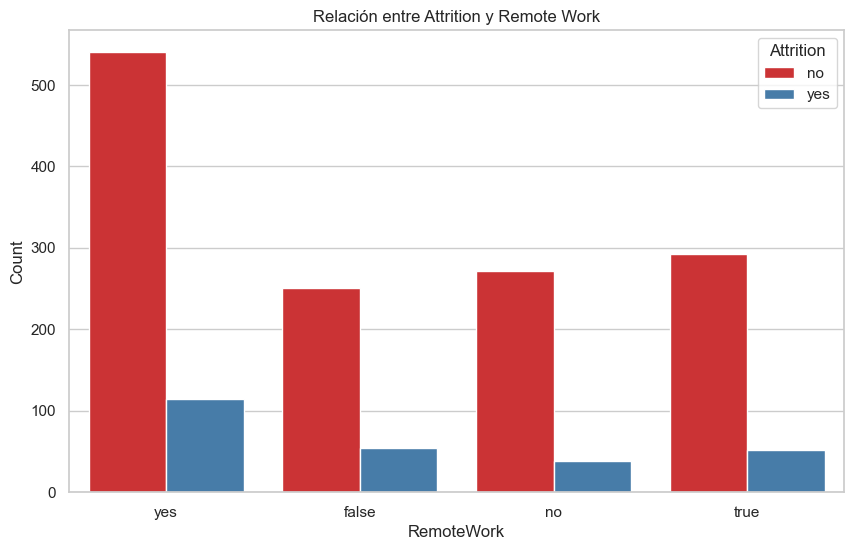

In [112]:
# Establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Usamos el método `countplot()` para contar cuántos datos por categoría en 'Attrition' con respecto a 'RemoteWork'
sns.countplot(x='RemoteWork', hue='Attrition', data=df_imputada, palette='Set1')

# Cambiamos el nombre del eje x
plt.xlabel('RemoteWork')

# Cambiamos el nombre del eje y
plt.ylabel('Count')

# Ponemos título a la gráfica
plt.title('Relación entre Attrition y Remote Work')

# Mostramos la gráfica
plt.show()


CONCLUSIÓN:
- La rotación de empleados (attrition) es más frecuente en la categoría "yes" de trabajo remoto.
- El trabajo remoto en la categoría "yes", está asociado con una mayor cantidad de empleados que permanecen en la empresa en comparación con aquellos que la dejan.
- Las categorías "yes" y "true" en trabajo remoto tienen una proporción más alta de empleados que dejan la empresa en comparación con "no" y "false".



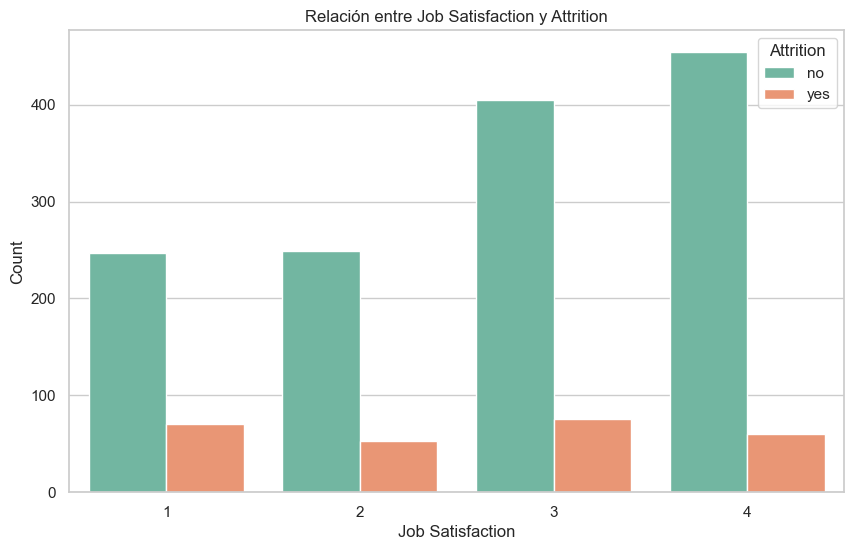

In [113]:

# Filtrar el DataFrame para incluir solo los valores de EnvironmentSatisfaction hasta 4
# df_filtered = df[df['EnvironmentSatisfaction'] <= 4]

# Establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Usamos el método `countplot()` para contar cuántos datos por categoría en 'Attrition' con respecto a 'JobSatisfaction'
sns.countplot(x='JobSatisfaction', hue='Attrition', data=df_imputada, palette='Set2')

# Cambiamos el nombre del eje x
plt.xlabel('Job Satisfaction')

# Cambiamos el nombre del eje y
plt.ylabel('Count')

# Ponemos título a la gráfica
plt.title('Relación entre Job Satisfaction y Attrition')

# Mostramos la gráfica
plt.show()


CONCLUSIÓN:

- Hay una relación inversa entre la satisfacción laboral y la rotación de empleados: A medida que aumenta la satisfacción laboral disminuye el número de empleados que abandonan la empresa.
- Mejorar la satisfacción laboral podría reducir la rotación de empleados, especialmente en los niveles de satisfacción más bajos.
- Existe una posible correlación entre la satisfacción laboral y la retención de empleados.
- Las estrategias para aumentar la satisfacción laboral, especialmente para aquellos en los niveles 1 y 2, pueden ser cruciales para retener empleados.


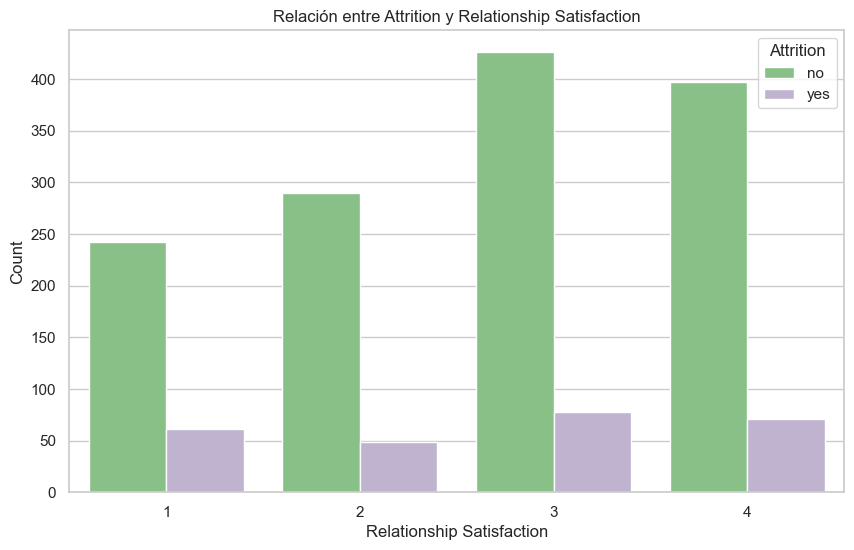

In [114]:
paleta = 'Accent'
# Establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Usamos el método `countplot()` para contar cuántos datos por categoría en 'Attrition' con respecto a 'RelationshipSatisfaction'
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=df_imputada, palette= paleta)

# Cambiamos el nombre del eje x
plt.xlabel('Relationship Satisfaction')

# Cambiamos el nombre del eje y
plt.ylabel('Count')

# Ponemos título a la gráfica
plt.title('Relación entre Attrition y Relationship Satisfaction')

# Mostramos la gráfica
plt.show() 

CONCLUSIÓN:
- Hay una relación inversa entre la satisfacción con las relaciones y la rotación de empleados: a mayor satisfacción con las relaciones, menor es la rotación.
- Mejorar la satisfacción con las relaciones podría reducir la rotación de empleados, especialmente en los niveles de satisfacción más bajos. 
-  Es importante rescatar que la puntuación más alta de satisfacción no corresponde con el nivel máximo de la misma y esta cifra se ve elevada también en la rotación de empleados, por lo tanto los empleados que se quedan como los que se van le dan buena puntuación (3) en la satisfacción de la empresa .
- En resumen, parece que hay una correlación entre la satisfacción con las relaciones laborales y la rotación de personal, a medida que la satisfacción disminuye, la rotación de personal aumenta.


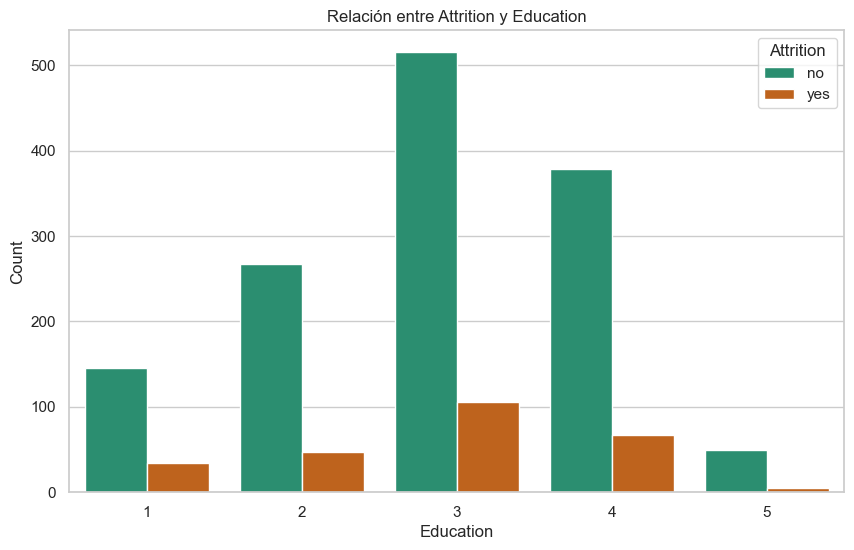

In [115]:
paleta = 'Dark2'
# Establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Usamos el método `countplot()` para contar cuántos datos por categoría en 'Attrition' con respecto a 'Education'
sns.countplot(x='Education', hue='Attrition', data=df_imputada, palette= paleta)

# Cambiamos el nombre del eje x
plt.xlabel('Education')

# Cambiamos el nombre del eje y
plt.ylabel('Count')

# Ponemos título a la gráfica
plt.title('Relación entre Attrition y Education')

# Mostramos la gráfica
plt.show() 

CONCLUSIÓN:
- En general, la tasa de atrición es más baja para los empleados con niveles de educación más altos (niveles 4 y 5).
- La diferencia más significativa se encuentra en el nivel de educación 3, donde el recuento de “no atrición” es considerablemente mayor que el de “sí atrición”.
- En resumen, parece haber una relación entre el nivel de educación y la atrición de empleados. Los empleados con niveles de educación más altos tienden a tener una menor tasa de atrición.

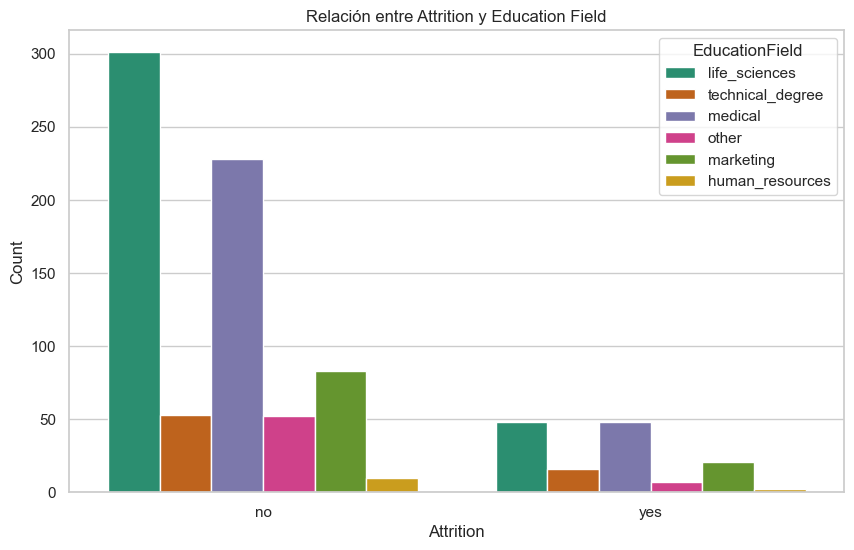

In [116]:
paleta = 'Dark2'
# Establecemos el tamaño de la gráfica
plt.figure(figsize=(10, 6))

# Usamos el método `countplot()` para contar cuántos datos por categoría en 'Attrition' con respecto a 'Education Field'
sns.countplot(x='Attrition', hue='EducationField', data=df_imputada, palette= paleta)

# Cambiamos el nombre del eje x
plt.xlabel('Attrition')

# Cambiamos el nombre del eje y
plt.ylabel('Count')

# Ponemos título a la gráfica
plt.title('Relación entre Attrition y Education Field')

# Mostramos la gráfica
plt.show() 

CONCLUSIÓN:

- Life Sciences: Este campo tiene la mayor cantidad de empleados con “no atrición” (en color naranja) y una cantidad menor con “sí atrición” (en verde).
- Technical Degree: Aunque no es tan alto como Life Sciences, este campo también tiene una cantidad significativa de empleados con “no atrición” y una cantidad mucho menor con “sí atrición”.
- Otros campos: Los demás campos (como Medical, Marketing y Recursos Humanos) tienen recuentos mucho más bajos en comparación.
- En resumen, este gráfico muestra cómo la atrición varía según el nivel de educación y el campo en el que trabajan los empleados. Los campos de Life Sciences y Technical Degree parecen tener tasas de retención más altas